# Testing routing pass with simple visualization
This notebook tests the routing pass with the features:
- Small coupling map
- Small circuit (GHZ without the H gate)
- No layout pass applied
    - This makes sure that the routing pass is only runnning one time each


In [1]:
from qiskit.transpiler.passes.routing.sabre_swap                import SabreSwap as SabreSwap_v045
from qiskit.transpiler.passes.routing.sabre_swap_v020           import SabreSwap as SabreSwap_v020
from qiskit.transpiler.passes.routing.sabre_swap_v020_lookahead import SabreSwap as SabreSwap_v020_lookahead
from ulti.circuits import get_circuit_list, sort_circuits_by_depth
from ulti.coupling_maps import file_to_coupling_map
from qiskit.transpiler import PassManager
import random
import time
random.seed(42)



/Users/henryzou/Documents/GitHub/qiskit/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


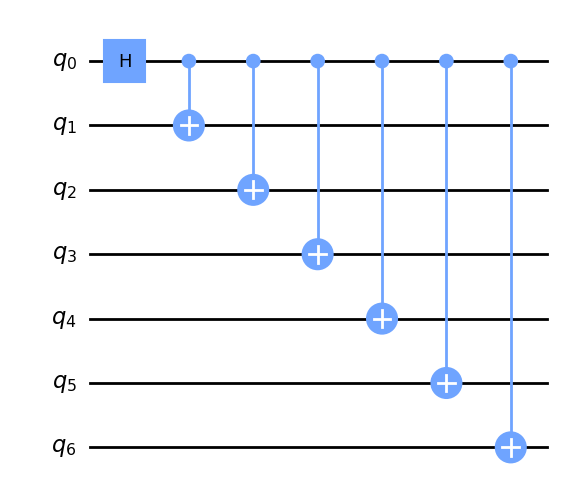

In [2]:
seed=42
cp_name = 'hex_7'
cm = file_to_coupling_map(f'coupling_maps/{cp_name}.txt')
# pass manager for Sabre v0.45
rp_v045 = SabreSwap_v045(cm, seed=seed)
pm_v045 = PassManager(rp_v045)

# pass manager for Sabre v0.20
rp_v020 = SabreSwap_v020(cm, seed=seed)
pm_v020 = PassManager(rp_v020)

# pass manager for Sabre v0.20 with lookahead
rp_v020_lookahead = SabreSwap_v020_lookahead(cm, seed=seed)
pm_v020_lookahead = PassManager(rp_v020_lookahead)

# creating the small circuit 
qc_name = 'ghz_2-127'
qc_list = get_circuit_list([f'circuits/{qc_name}/'])
qc_list = sort_circuits_by_depth(qc_list)
qc = qc_list[5]
qc.draw(output='mpl')

In [3]:
# Start timing the transpilation for v0.45
start_time = time.time()
qc_tr_45 = pm_v045.run(qc)
#qc_tr_45 = qc_tr_45.decompose(["swap"])
duration_45 = time.time() - start_time

# Start timing the transpilation for v0.20
start_time = time.time()
qc_tr_20 = pm_v020.run(qc)
#qc_tr_20 = qc_tr_20.decompose(["swap"])
duration_20 = time.time() - start_time

# Start timing the transpilation for v0.20 with lookahead
start_time = time.time()
qc_tr_20_lookahead = pm_v020_lookahead.run(qc)
#qc_tr_20_lookahead = qc_tr_20_lookahead.decompose(["swap"])
duration_20_lookahead = time.time() - start_time

# Print the depth and duration for each transpilation
print(f"{'Depth of the circuit after transpiled v0.45:':<60}{qc_tr_45.depth():<10}{'Time taken:':<20}{duration_45:.5f} seconds")
print(f"{'Depth of the circuit after transpiled v0.20:':<60}{qc_tr_20.depth():<10}{'Time taken:':<20}{duration_20:.5f} seconds")
print(f"{'Depth of the circuit after transpiled v0.20 with lookahead:':<60}{qc_tr_20_lookahead.depth():<10}{'Time taken:':<20}{duration_20_lookahead:.5f} seconds")

Depth of the circuit after transpiled v0.45:                12        Time taken:         0.00067 seconds
Depth of the circuit after transpiled v0.20:                11        Time taken:         0.00108 seconds
Depth of the circuit after transpiled v0.20 with lookahead: 12        Time taken:         0.00179 seconds


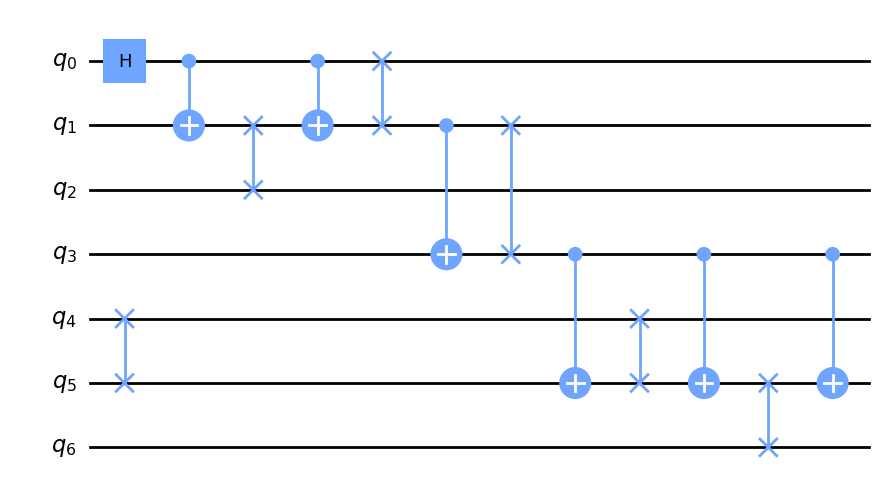

In [4]:
qc_tr_45.draw(output='mpl', idle_wires=False)

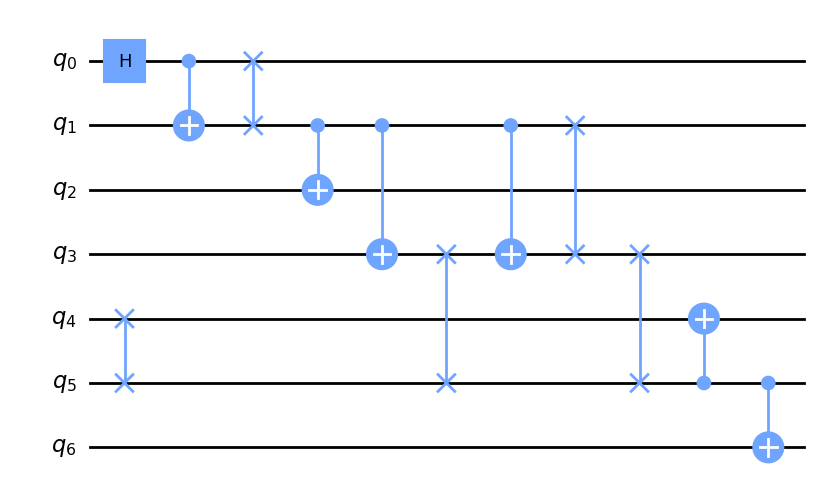

In [5]:
qc_tr_20.draw(output='mpl', idle_wires=False)

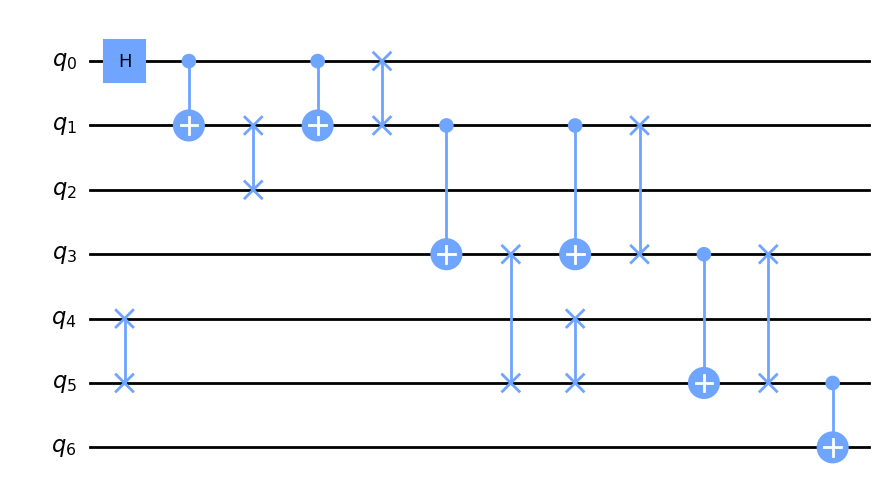

In [6]:
qc_tr_20_lookahead.draw(output='mpl', idle_wires=False)